## Convolutional Neural Network 



In this notebook you will learn to distinguish dogs from cats!

Data:
https://drive.google.com/drive/folders/1nzVk4GOvKR6P87uPszUkKMPtaXV_wrZf?usp=sharing

Fill all the necessary gaps in cells below and fit neural networks for solving the binary classification task.

## Task 1:

1. Build and fit CNN with 3 convolutional layers for binary classification
2. Evaluate accuracy on test data
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)

First, let's load all the necessary functions:


In [1]:
import os
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.applications.vgg16 import VGG16
from keras.applications.efficientnet_v2 import EfficientNetV2L
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

2022-02-24 10:12:48.917820: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-24 10:12:48.917853: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


The images collected for training and testing the deep learning model must be prepared: split the entire set into a training, validation and test sample, observing the balancing of classes (with binary classification they should be approximately equal in all three samples).

This has _already_ been done: in the Cats_and_Dogs directory there are three subdirectories: train, test and val - training, test and validation samples, respectively.

In [2]:
# Initialize the folders with train, test and validation datasets (in "/My Drive/..." or from your local repository where you have downloaded data):

train = './Cats_and_Dogs/train'
val =   './Cats_and_Dogs/val'
test =  './Cats_and_Dogs/test'
custom =  './catsanddogsML'

# The shape of the RGB image
img_width, img_height, channels = 150, 150, 3 # you can try different sizes

# input shape
input_shape = (img_width, img_height, channels)
# position matters!
# Number_of_channels can be at the first or the last position
# in our case - "channels last"

# minibatch size
batch_size = 64
# train set size
nb_train_samples = 20000
# validation set size 
nb_validation_samples = 2490
# test set size
nb_test_samples = 2500

custom_samples = 2

## Prepare the data.

You don’t have to manually change the shapes of 25000 images and convert them into the necessary format for keras (img_width, img_height, 3).

We will use the built-in image preprocessing function _ImageGenerator()_.

It performs scaling, resizes selected images and prepares batches (mini-samples) to train the model.

Set the network architecture by sequentially adding layers to it:
1. A convolutional layer with 16 neurons, filter size 3x3. Activation function - 'relu'
2. MaxPooling layer with filter size 2x2.
3. A convolutional layer with 32 neurons, filter size 3x3. Activation function - 'relu'
4. MaxPooling layer with filter size 2x2.
5. A convolutional layer with 64 neurons, filter size 3x3. Activation function - 'relu'
6. MaxPooling layer with filter size 2x2.
7. Operation model.add (Flatten ()), which makes a one-dimensional vector of the resulting feature maps.
8. A fully connected layer with 64 neurons. Activation function - 'relu'
9. Use model.add (Dropout (0.5)) which excludes the edge from the current layer in the computational graph with a 50% probability to avoid overfitting.
10. A fully connected layer with 1 neuron. Activation function - 'sigmoid', because binary classification model.

Add to the model all the missing layers, by analogy with the already specified.
Keras documentation: https://keras.io/layers/about-keras-layers/

In [30]:
datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = datagen.flow_from_directory(
    train,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

val_generator = datagen.flow_from_directory(
    val,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = datagen.flow_from_directory(
    test,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

custom_generator = datagen.flow_from_directory(
    custom,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 2490 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.
Found 4 images belonging to 2 classes.


In [4]:
model = Sequential()

# 1: A convolutional layer with 16 neurons, filter size 3x3. Activation function - 'relu'
# For example:
model.add(Conv2D(16, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))

# 2: MaxPooling layer with filter size 2x2.
model.add(MaxPooling2D((2, 2)))

# 3: A convolutional layer with 32 neurons, filter size 3x3. Activation function - 'relu'
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))

# 4:  MaxPooling layer with filter size 2x2.
model.add(MaxPooling2D((2, 2)))

# 5:  A convolutional layer with 64 neurons, filter size 3x3. Activation function - 'relu'
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))

# 6: MaxPooling layer with filter size 2x2.
model.add(MaxPooling2D((2, 2)))

# 7: Operation model.add (Flatten ()), which makes a one-dimensional vector of the resulting feature maps.
model.add(Flatten())

# 8: A fully connected layer with 64 neurons. Activation function - 'relu'
model.add(Dense(64))
model.add(Activation('relu'))

# 9: Use model.add (Dropout (0.5)) which excludes the edge from the current layer in the computational graph with a 50% probability to avoid overfitting.
model.add(Dropout(0.5))

# 10: Use model.add (Dropout (0.5)) which excludes the edge from the current layer in the computational graph with a 50% probability to avoid overfitting.
model.add(Dense(1))

#  A fully connected layer with 1 neuron. Activation function - 'sigmoid', because binary classification model.
model.add(Activation('sigmoid'))

2022-02-24 10:12:52.067129: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-24 10:12:52.067579: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-24 10:12:52.067665: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-02-24 10:12:52.067740: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-02-24 10:12:52.067831: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [5]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [6]:
# use generator for training the model ("fit" method analog)
model_fitted = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=15,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/15
312/312 [==============================] - 115s 366ms/step - loss: 0.6366 - accuracy: 0.6352 - val_loss: 0.5592 - val_accuracy: 0.7130
Epoch 2/15
312/312 [==============================] - 110s 351ms/step - loss: 0.5240 - accuracy: 0.7450 - val_loss: 0.4923 - val_accuracy: 0.7553
Epoch 3/15
312/312 [==============================] - 112s 358ms/step - loss: 0.4598 - accuracy: 0.7869 - val_loss: 0.4388 - val_accuracy: 0.7952
Epoch 4/15
312/312 [==============================] - 118s 378ms/step - loss: 0.4065 - accuracy: 0.8204 - val_loss: 0.4345 - val_accuracy: 0.8018
Epoch 5/15
312/312 [==============================] - 123s 393ms/step - loss: 0.3636 - accuracy: 0.8427 - val_loss: 0.3963 - val_accuracy: 0.8269
Epoch 6/15
312/312 [==============================] - 118s 378ms/step - loss: 0.3246 - accuracy: 0.8609 - val_loss: 0.3989 - val_accuracy: 0.8174
Epoch 7/15
312/312 [==============================] - 120s 383ms/step - loss: 0.2805 - accuracy: 0.8822 - val_loss: 0.4022 -

In [7]:
# NOTE: if the accuracy on test data after 15 epochs is less than 80% smth goes wrong

scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

Accuracy on test data: 82.61%


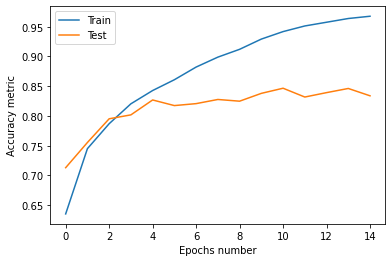

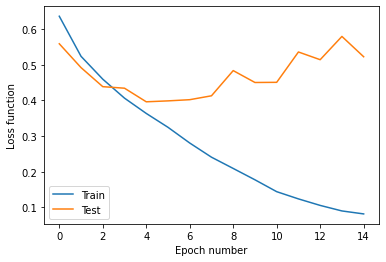

In [8]:
import matplotlib.pyplot as plt

plt.plot(model_fitted.history['accuracy'])
plt.plot(model_fitted.history['val_accuracy'])
plt.ylabel('Accuracy metric')
plt.xlabel('Epochs number')
plt.legend(['Train', 'Test'])
plt.show()

plt.plot(model_fitted.history['loss'])
plt.plot(model_fitted.history['val_loss'])
plt.ylabel('Loss function')
plt.xlabel('Epoch number')
plt.legend(['Train', 'Test'])
plt.show()

Plot the graphs: 

- Loss(Number of epochs)

- Accuracy(Number of epochs)

In [9]:
# use the generator to train the model (analogue of the fit method)
# 1 epoch of training on a CPU will take 4-6 minutes. The GPU is an ~order of magnitude faster.
# THE FIRST EPOCH USUALLY TAKES MUCH LARGER TIME AS KERAS SHOULD BUILD THE COMPUTATIONAL GRAPH

model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs= 10, # try different number of epochs: 10, 15, 20; check the loss and accuracy;
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/10
312/312 [==============================] - 121s 389ms/step - loss: 0.0764 - accuracy: 0.9689 - val_loss: 0.6442 - val_accuracy: 0.8339
Epoch 2/10
312/312 [==============================] - 122s 390ms/step - loss: 0.0712 - accuracy: 0.9718 - val_loss: 0.8059 - val_accuracy: 0.8170
Epoch 3/10
312/312 [==============================] - 118s 377ms/step - loss: 0.0685 - accuracy: 0.9728 - val_loss: 0.7010 - val_accuracy: 0.8372
Epoch 4/10
312/312 [==============================] - 122s 390ms/step - loss: 0.0597 - accuracy: 0.9764 - val_loss: 0.6815 - val_accuracy: 0.8359
Epoch 5/10
312/312 [==============================] - 124s 396ms/step - loss: 0.0586 - accuracy: 0.9757 - val_loss: 0.7269 - val_accuracy: 0.8294
Epoch 6/10
312/312 [==============================] - 114s 364ms/step - loss: 0.0604 - accuracy: 0.9750 - val_loss: 0.7026 - val_accuracy: 0.8187
Epoch 7/10
312/312 [==============================] - 108s 347ms/step - loss: 0.0540 - accuracy: 0.9774 - val_loss: 0.7767 -

In [10]:
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

Accuracy on test data: 83.41%


Let's try to improve the quality of recognition, using the method of transfer lerning. 

We will use weights of deep neural networks already trained on large dataset such as  ImageNet, and provide fine tuning of several additional dense layers on new data relevant to the current classification task. The more new images will differ from those on which the network has been trained, the more layers will need to be “retrained” in order to get good classification accuracy. The intuition here is that the model has already learned how to highlight the necessary features on the images in the large dataset, it only needs to be “tweaked” for a specific task.

## Task 2

1. Build and fit Transfer Learning model using pre-trained VGG16-model weights from keras application.
2. Do the same with **another avaliable pre-trained deep learning model** from keras application https://keras.io/api/applications/.
2. Evaluate accuracy on test data for p.1 and p.2
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)
4. Check the performance of your model with the custom image of cat or dog (so the model will tell which class this image belongs to). Develop the function for the inference of the best algorithm.

In [11]:
# First, download the weights of the VGG16 network trained on the ImageNet dataset:

vgg16_net = VGG16(weights='imagenet', 
                  include_top=False,      # we take only the "convolution" part, the last layers we add ourselves
                  input_shape=(150, 150, 3))
vgg16_net.trainable = False               # clearly prescribe that we do NOT overload the network.
                                          # Weights VGG16 in the process of learning will remain unchanged!

vgg16_net.summary()                       # pay attention to the number of trained and untrained parameters

58900480/58889256 [==============================] - 23s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                             

We construct our model of "transfer learning" by adding two fully connected layers to VGG16

In [12]:
# add layers to VGG16:

modelvgg = Sequential()
modelvgg.add(vgg16_net)

# + flattening
modelvgg.add(Flatten())
# + Dense fullyconnected layer with 256 neurons
modelvgg.add(Dense(256))
# + ReLu
modelvgg.add(Activation('relu'))
# + Dropout
modelvgg.add(Dropout(0.5))
# + Dense layer with 1 neuron
modelvgg.add(Dense(1))
# + sigmoid
modelvgg.add(Activation('sigmoid'))

modelvgg.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 activation_5 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
 activation_6 (Activation)   (None, 1)                

In [13]:
modelvgg.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=1e-5), 
              metrics=['accuracy'])

In [14]:
# We also use the generator to train the model (similar to the fit method)
# Without using a GPU, learning 1 epoch of such a network will take about an hour. Plan your time =)
# If you have access to a GPU, you can try 10-12 epochs - the quality should increase even more.

modelvgg_fitted = modelvgg.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=6,
    validation_data=val_generator)

Epoch 1/6
312/312 [==============================] - 1037s 3s/step - loss: 0.5123 - accuracy: 0.7347 - val_loss: 0.3516 - val_accuracy: 0.8622
Epoch 2/6
312/312 [==============================] - 943s 3s/step - loss: 0.3398 - accuracy: 0.8513 - val_loss: 0.2964 - val_accuracy: 0.8783
Epoch 3/6
312/312 [==============================] - 951s 3s/step - loss: 0.2985 - accuracy: 0.8747 - val_loss: 0.2731 - val_accuracy: 0.8932
Epoch 4/6
312/312 [==============================] - 965s 3s/step - loss: 0.2731 - accuracy: 0.8857 - val_loss: 0.2580 - val_accuracy: 0.8992
Epoch 5/6
312/312 [==============================] - 961s 3s/step - loss: 0.2591 - accuracy: 0.8919 - val_loss: 0.2491 - val_accuracy: 0.9020
Epoch 6/6
312/312 [==============================] - 973s 3s/step - loss: 0.2451 - accuracy: 0.8985 - val_loss: 0.2419 - val_accuracy: 0.9056


In [15]:
scores = modelvgg.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

Accuracy on test data: 89.54%


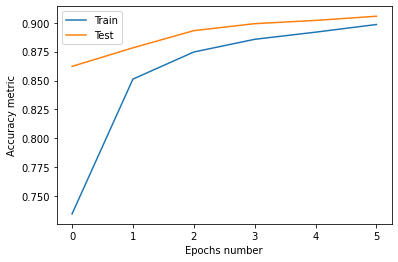

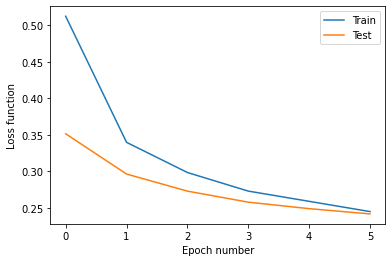

In [16]:
plt.plot(modelvgg_fitted.history['accuracy'])
plt.plot(modelvgg_fitted.history['val_accuracy'])
plt.ylabel('Accuracy metric')
plt.xlabel('Epochs number')
plt.legend(['Train', 'Test'])
plt.show()

plt.plot(modelvgg_fitted.history['loss'])
plt.plot(modelvgg_fitted.history['val_loss'])
plt.ylabel('Loss function')
plt.xlabel('Epoch number')
plt.legend(['Train', 'Test'])
plt.show()

In [17]:
en2l = EfficientNetV2L(weights='imagenet', 
                  include_top=False,      # we take only the "convolution" part, the last layers we add ourselves
                  input_shape=(150, 150, 3))
en2l.trainable = False               # clearly prescribe that we do NOT overload the network.
                                          # Weights VGG16 in the process of learning will remain unchanged!

en2l.summary()                       # pay attention to the number of trained and untrained parameters

473186304/473176280 [==============================] - 310s 1us/step
Model: "efficientnetv2-l"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 150, 150, 3)  0           ['input_2[0][0]']                
                                                                                                  
 stem_conv (Conv2D)             (None, 75, 75, 32)   864         ['rescaling[0][0]']              
                                                                                                  
 stem_bn (Batc

In [18]:
# add layers to VGG16:

en2l_seq = Sequential()
en2l_seq.add(en2l)

# + flattening
en2l_seq.add(Flatten())
# + Dense fullyconnected layer with 256 neurons
en2l_seq.add(Dense(256))
# + ReLu
en2l_seq.add(Activation('relu'))
# + Dropout
en2l_seq.add(Dropout(0.5))
# + Dense layer with 1 neuron
en2l_seq.add(Dense(1))
# + sigmoid
en2l_seq.add(Activation('sigmoid'))

en2l_seq.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-l (Functiona  (None, 5, 5, 1280)       117746848 
 l)                                                              
                                                                 
 flatten_2 (Flatten)         (None, 32000)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               8192256   
                                                                 
 activation_7 (Activation)   (None, 256)               0         
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                      

In [19]:
en2l_seq.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=1e-5), 
              metrics=['accuracy'])

In [20]:
en2l_seq_fitted = en2l_seq.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=6,
    validation_data=val_generator)

Epoch 1/6
312/312 [==============================] - 1594s 5s/step - loss: 0.6789 - accuracy: 0.5869 - val_loss: 0.6520 - val_accuracy: 0.6221
Epoch 2/6
312/312 [==============================] - 1576s 5s/step - loss: 0.6540 - accuracy: 0.6131 - val_loss: 0.6472 - val_accuracy: 0.6301
Epoch 3/6
312/312 [==============================] - 1499s 5s/step - loss: 0.6462 - accuracy: 0.6229 - val_loss: 0.6501 - val_accuracy: 0.6169
Epoch 4/6
312/312 [==============================] - 1563s 5s/step - loss: 0.6406 - accuracy: 0.6332 - val_loss: 0.6378 - val_accuracy: 0.6365
Epoch 5/6
312/312 [==============================] - 1527s 5s/step - loss: 0.6368 - accuracy: 0.6370 - val_loss: 0.6349 - val_accuracy: 0.6386
Epoch 6/6
312/312 [==============================] - 1594s 5s/step - loss: 0.6326 - accuracy: 0.6430 - val_loss: 0.6406 - val_accuracy: 0.6434


Accuracy on test data: 64.58%


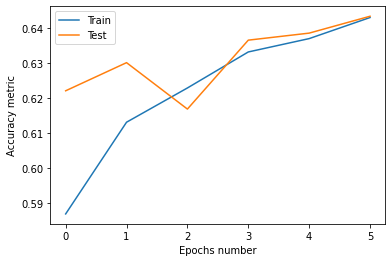

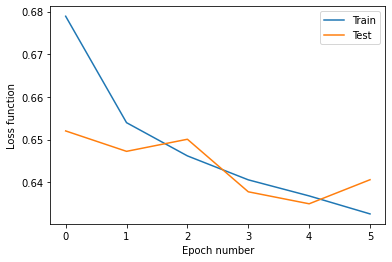

In [23]:
scoresen2l = en2l_seq.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scoresen2l[1]*100))

plt.plot(en2l_seq_fitted.history['accuracy'])
plt.plot(en2l_seq_fitted.history['val_accuracy'])
plt.ylabel('Accuracy metric')
plt.xlabel('Epochs number')
plt.legend(['Train', 'Test'])
plt.show()

plt.plot(en2l_seq_fitted.history['loss'])
plt.plot(en2l_seq_fitted.history['val_loss'])
plt.ylabel('Loss function')
plt.xlabel('Epoch number')
plt.legend(['Train', 'Test'])
plt.show()

In [33]:
#evaluate models

scores_std = model.evaluate_generator(custom_generator, 2)
print("Accuracy on custom data for standard network: %.2f%%" % (scores_std[1]*100))

scores_vgg = modelvgg.evaluate_generator(custom_generator, 2)
print("Accuracy on custom data for VGG16: %.2f%%" % (scores_vgg[1]*100))

scores_enl2 = en2l_seq.evaluate_generator(custom_generator, 2)
print("Accuracy on custom data for EN2L: %.2f%%" % (scores_enl2[1]*100))

max_acc = scores_std[1]
max_model = 'std'

if max_acc < scores_vgg[1]:
  max_acc = scores_vgg[1]
  max_model = 'vgg'

if max_acc == scores_vgg[1]:
  max_model += ', vgg'

if max_acc < scores_enl2[1]:
  max_acc = scores_enl2[1]
  max_model = 'enl2'

if max_acc == scores_enl2[1]:
  max_model += ', enl2'


print(f'The best model is {max_model}')

Accuracy on custom data for standard network: 50.00%
Accuracy on custom data for VGG16: 50.00%
Accuracy on custom data for EN2L: 50.00%
The best model is std, vgg, enl2
